In [55]:
# csv 읽어옴
import pandas as pd
# df = pd.read_csv("food.csv", encoding ='utf-8')
# for i in df['name'][:3]:
#     print(i)
with open("food.csv", 'rt') as f:
    food_names = f.read().split()
food_names

UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 6: illegal multibyte sequence

In [19]:
def get_html(url):
    html = ''
    res = requests.get(url)
    if res.status_code == 200:
        res.encoding = 'utf-8'
        html = res.text
    return html

In [47]:
#데이터 가져옴
import requests
from bs4 import BeautifulSoup
from pandas import DataFrame

keys=food_names
img1 = []
img2 = []

for key in keys:
    result = get_html('https://search.naver.com/search.naver?where=image&sm=tab_jum&query={}'.format(key))

    soup = BeautifulSoup(result, 'html.parser')
    nums1 = soup.select_one('#_sau_imageTab > div.photowall._photoGridWrapper > div.photo_grid._box > div:nth-child(1) > a.thumb._thumb > img')
    nums2 = soup.select_one('#_sau_imageTab > div.photowall._photoGridWrapper > div.photo_grid._box > div:nth-child(2) > a.thumb._thumb > img')
    img1.append(nums1.attrs['data-source'])
    img2.append(nums2.attrs['data-source'])

In [53]:
dict_image = {'food_names': food_names, 'img1': img1, 'img2': img2}

df = DataFrame(dict_image, columns= ['food_names', 'img1', 'img2'])
df
# export_csv = df.to_csv('food2.csv', index=False, encoding='utf-8')

,food_names,img1,img2
0,계란후라이,https://search.pstatic.net/common/?src=http%3A...,https://search.pstatic.net/common/?src=http%3A...
1,파프리카,https://search.pstatic.net/common/?src=http%3A...,https://search.pstatic.net/common/?src=http%3A...
2,졸리비,https://search.pstatic.net/common/?src=http%3A...,https://search.pstatic.net/common/?src=http%3A...
3,김치,https://search.pstatic.net/common/?src=http%3A...,https://search.pstatic.net/common/?src=http%3A...
4,크림파스타,https://search.pstatic.net/common/?src=http%3A...,https://search.pstatic.net/common/?src=http%3A...
...,...,...,...
162,녹차라떼,https://search.pstatic.net/common/?src=http%3A...,https://search.pstatic.net/common/?src=http%3A...
163,카스텔라,https://search.pstatic.net/common/?src=http%3A...,https://search.pstatic.net/common/?src=http%3A...
164,컵라면,https://search.pstatic.net/common/?src=http%3A...,https://search.pstatic.net/common/?src=http%3A...
165,초콜릿,https://search.pstatic.net/common/?src=http%3A...,https://search.pstatic.net/common/?src=http%3A...


In [ ]:
# 사진 excel에 넣기
from pandas import DataFrame

cars = {'img1': [img1],
        'img2': [img2]
        }

df = DataFrame(cars, columns= ['img1', 'img2'])

export_csv = df.to_csv('food2.csv', index=False, encoding='utf-8')

print (df)

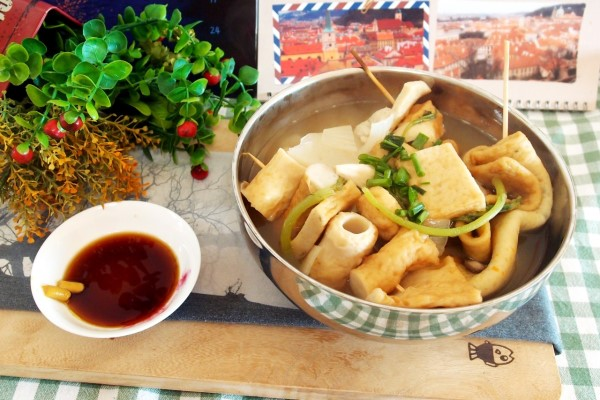

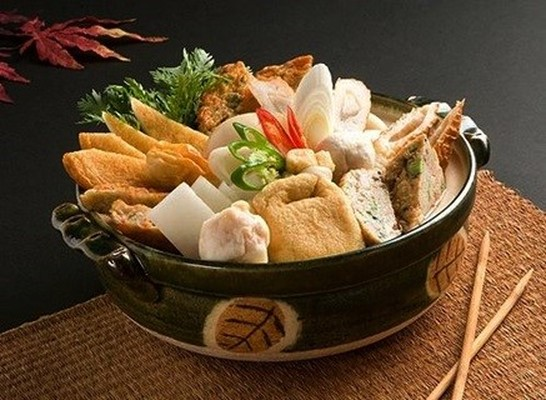

In [31]:
#화면보기
from PIL import Image 
import requests
from io import BytesIO
response1 = requests.get(img1)
response2 = requests.get(img2)
showimg1 = Image.open(BytesIO(response1.content))
showimg2 = Image.open(BytesIO(response2.content))
display(showimg1)
display(showimg2)

In [42]:
from pandas import DataFrame

cars = {'img1': [img1],
        'img2': [img2]
        }

df = DataFrame(cars, columns= ['img1', 'img2'])

export_csv = df.to_csv('food2.csv', index=False, encoding='utf-8')

print (df)

                                                img1  \
0  https://search.pstatic.net/common/?src=http%3A...   

                                                img2  
0  https://search.pstatic.net/common/?src=http%3A...  
